## **Laboratorio 14: Clasificación por regresión logística**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2340 Fundamentos del machine learning**

 **Nombres de los integrantes**


1.   John Anderson Acosta
2.   Nombre integrante 2

**Número del grupo**

*Grupo 02*

# **Introducción**

La regresión logística es una técnica matemática de análisis de datos que busca clasficarlos en dos etiquetas a través de una frontera de separación modelada como un plano. Dicho plano se puede escribir de la siguiente forma:

\begin{align*}
  w^Tx+b = 0
\end{align*}

Donde $w$ son los coeficientes del plano, $b$ el intercepto y $x$ las varaibles asociadas a las características de los datos, es decir: $x,w \in \mathbb{R}^n$ y $c \in \mathbb{R}$, luego, el objetivo de la regresión logística es encontrar los coeficientes $w$ y el intercepto $b$ tal que el plano separe los datos por etiquetas correctamente. La forma de hacerlo es mediante el proceso de entrenamiento con observaciones y sus respectivas etiquetas a través del aprendizaje supervisado.

# **Contexto del problema**

Uno de lo cánceres más comunes entre la población femenina es el cáncer de seno. Éste ocurre cuando las células normales mutan y se transforman en células cancerígenas. Esta transformación puede ser evaluada a través de procedimientos en los que se extraen muestras que se observan bajo el microscopio. Se ha mostrado que en etapas tempranas el núcleo de las células provenientes de los tumores cambia su morfología, permitiendo predecir el desarrollo del cáncer (Narasimha et al., 2013).

En el presente laboratorio se va a encontrar una recta para predecir si las células provenientes de un tumor están en proceso de mutación carcinogénica o no. Es decir, diseñaremos un modelo para clasificación, la cual es una tarea que hace parte del paradigma de aprendizaje supervisado en machine learning. El objetivo es encontrar una recta que parta el espacio en dos regiones: una asociada a las observaciones que son consideradas como malignas y otra región asociada a las observaciones que son concideradas como benignas.

Para entrenar el modelo usaremos una base de datos que consta de 469 muestras obtenidas de dos tipos de pacientes: aquellas que desarrollaron cáncer de seno y las que no. Clasificaremos dicha aparición a partir de dos características que se extraen las imágenes: el **radio promedio** y **índice de suavidad** (_smoothness index_) de los núcleos de las células. Esta última medida hace referencia a un índice de variación local del radio en un mismo núcleo, por lo que ante menor índice de suavidad, más redondo será el núcleo. Estas medidas se toman a partir de una imagen del tejido, como se muestra en la Figura 1.


<center> Figura 1. Muestras de núcleos celulares de biopsias de tumores de seno, los núcleos pequeños y redondos proceden de muestras no-cancerígenas (Narasimha et al., 2013). </center>

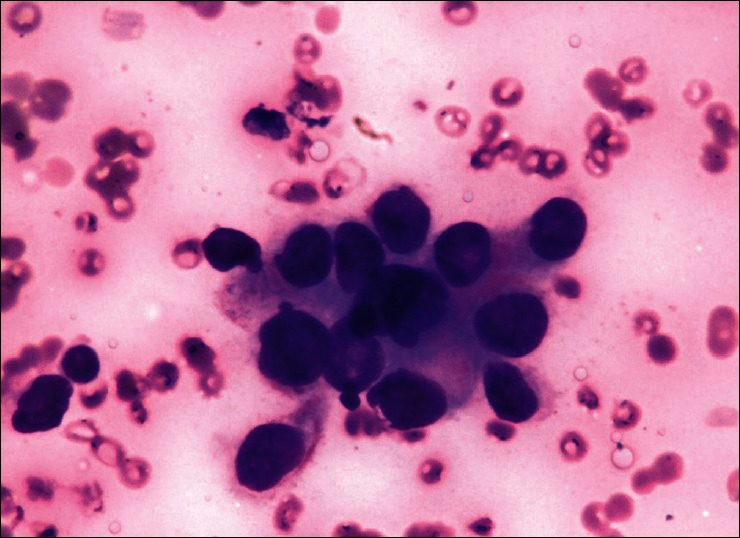

> Narasimha, A., Vasavi, B., & Kumar, H. M. (2013). Significance of nuclear morphometry in benign and malignant breast aspirates. _International Journal of Applied and Basic Medical Research_, 3(1), 22.


1. Importe los datos del archivo *Breast_Cancer_Train.csv*. Este archivo corresponde a un dataframe con encabezados. El encabezado _"Pronostic"_ corresponde al pronóstico de las muestras:

- $1 =$ la muestra proviene de un tumor maligno.
- $0 =$ la muestra proviene de un tumor benigno.

Realice un **scatter plot** de dos dimensiones donde cada muestra es un punto y el color está asociado al diagnóstico. Elija colores distintos para cada diagnóstico, y analice la gráfica resultante.


     radius_mean  smoothness_mean  pronostic
0          17.99          0.11840          1
1          20.57          0.08474          1
2          19.69          0.10960          1
3          11.42          0.14250          1
4          20.29          0.10030          1
..           ...              ...        ...
464        13.71          0.09916          0
465        10.03          0.08117          0
466        15.00          0.08371          0
467        13.20          0.07215          0
468        12.36          0.08772          0

[469 rows x 3 columns]


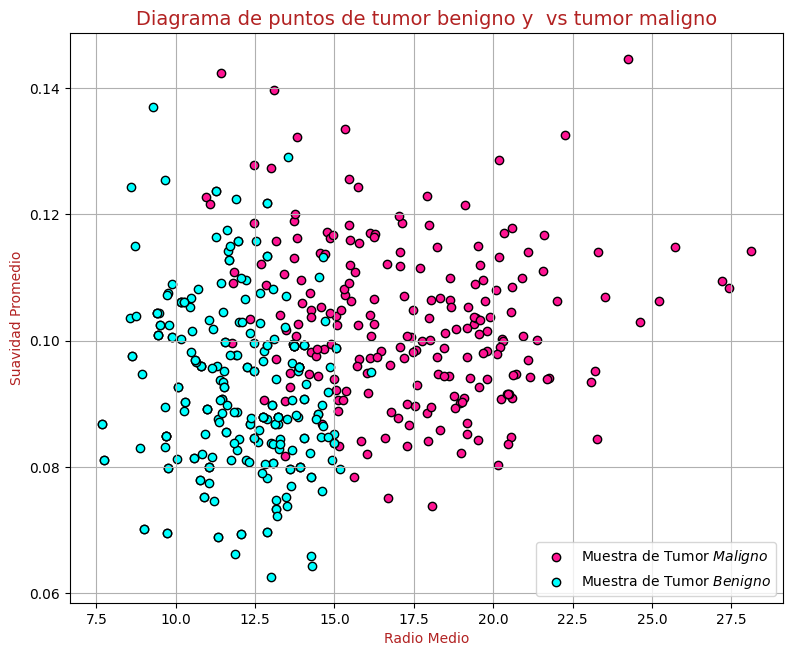

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Breast_Cancer_Train.csv")

print(df)

#Hacer el Scatter plot
plt.figure(figsize=(9.2, 7.4))
plt.scatter(df[df["pronostic"] == 1]["radius_mean"], df[df["pronostic"] == 1]["smoothness_mean"],
            color="deeppink", label="Muestra de Tumor $Maligno$", edgecolors="black")
plt.scatter(df[df["pronostic"] == 0]["radius_mean"], df[df["pronostic"] == 0]["smoothness_mean"],
            color="cyan", label="Muestra de Tumor $Benigno$", edgecolors="black")
plt.title("Diagrama de puntos de tumor benigno y  vs tumor maligno", color ="firebrick", size =14)
plt.xlabel("Radio Medio", color ="firebrick", size =10)
plt.ylabel("Suavidad Promedio", color ="firebrick", size =10)
plt.legend()
plt.grid(True)
plt.show()


2. Note que cada característica tiene un dominio diferente, donde el *smoothness* va desde $0.06$ hasta $0.14$, mientras que el *radius* va desde $7.5$ hasta $27.5$. Lo anterior afecta directamente en el modelo que construye el plano de separación, es decir, afecta los valores de $w$ y de $b$, por lo que puede tener prioridad una característica sobre otra. La forma de solucionar lo anterior es estandarizando los datos, lo cual se logra medinte la función `StandarScaler` de la librería `sklearn` de la siguiente forma:

```
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```
Donde `X`  es un arreglo que contiene todas las observaciones para todas las características, es decir:


\begin{align*}
  X =
  \begin{bmatrix}
    x_1^{(1)} & x_2^{(1)} & ⋯ & x_n^{(1)} \\
    x_1^{(2)} & x_2^{(2)} & ⋯ & x_n^{(2)} \\
    \vdots & \vdots & \ddots & \vdots\\
    x_1^{(m)} & x_2^{(m)} & ⋯ & x_n^{(m)}
  \end{bmatrix}
\end{align*}

Donde $x_i^{(j)}$ es la observación $j$ para la característica $i$.

Escriba una función que reciba el arreglo de observaciones $X$ y lo retorne con los datos estandarizados. Realice de nuevo el **scatter plot** anterior pero con los datos estandarizados.

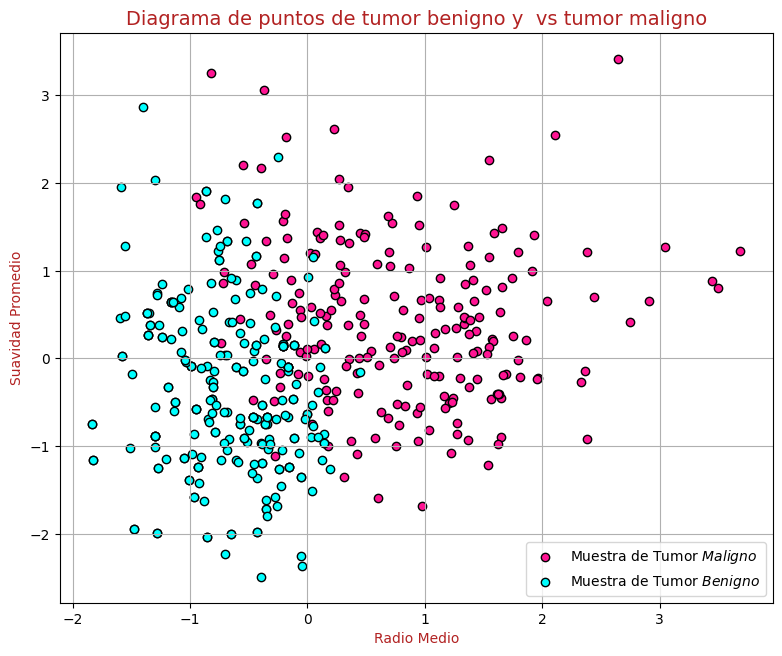

In [ ]:
#Funcion para estandarizar :

from sklearn.preprocessing import StandardScaler

def estandarizacion(x):
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  return X_scaled

Estandar = ["radius_mean", "smoothness_mean"]
X = df[Estandar]
Y = estandarizacion(X)

#Scatter plot estandarizado
plt.figure(figsize=(9.2, 7.4))
plt.scatter(Y[df["pronostic"] == 1][:, 0], Y[df["pronostic"] == 1][:, 1],
            color="deeppink", label="Muestra de Tumor $Maligno$", edgecolors="black")
plt.scatter(Y[df["pronostic"] == 0][:, 0], Y[df["pronostic"] == 0][:, 1],
            color="cyan",  label="Muestra de Tumor $Benigno$", edgecolors="black")
plt.title("Diagrama de puntos de tumor benigno y  vs tumor maligno", color ="firebrick", size =14)
plt.xlabel("Radio Medio", color ="firebrick", size =10)
plt.ylabel("Suavidad Promedio", color ="firebrick", size =10)
plt.legend()
plt.grid(True)
plt.show()


3. Encuentre la recta que separa utilizando la función `LogisticRegression` de la librería `sklearn.linear_model`. Ajuste el modelo a los datos estandarizados con el método `.fit`. Esta función implementa el proceso que se llama 'regresión logística', el cual permite encontrar una recta (o plano) de la forma $w^Tx+b=0$ que separa los datos de dos clases diferentes. La forma de utilizarla es la siguiente:

```
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled, y)
```

Donde `y` es el vector de etiquetas, es decir:


\begin{align*}
  y = \left[ y^{(1)}, y^{(2)}, ..., y^{(m)}\right]^T
\end{align*}

Donde $y^{(j)}$ es la etiqueta para la observación $x^{(j)}$. Luego, para obtener los coeficiente $w$ y el intercepto $b$ se usa el modelo creado así:

```
w = model.coef_.flatten()
b = model.intercept_

```

Para lo anterior, escriba una función que reciba los datos estandarizados y el vector de etiquetas y retorne el vector de coeficientes $w$ y el intercepto $b$.



In [ ]:
from sklearn.linear_model import LogisticRegression
pronostic = df["pronostic"]
def coe_intercepto(datos_estandar, etiquetas):
    model = LogisticRegression()
    model.fit(datos_estandar, etiquetas)
    w = model.coef_.flatten()
    b = model.intercept_
    return w, b

datos = coe_intercepto(Y, pronostic)
coeficiente_W,Intercepto_b= datos[0],datos[1]


print(coeficiente_W)
print(Intercepto_b)

[4.16392547 1.33631064]
[0.09687145]


4. Realice de nuevo el **scatter plot** del punto 2 pero ahora incluya la recta de separación. Procure que esta no redimensione la figura del gráfico sino que tenga el mismo tamaño que antes.

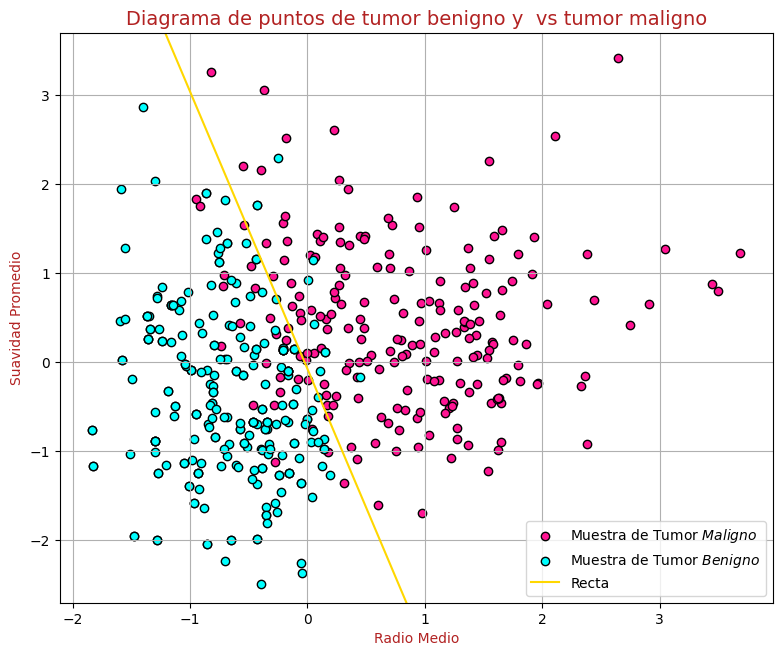

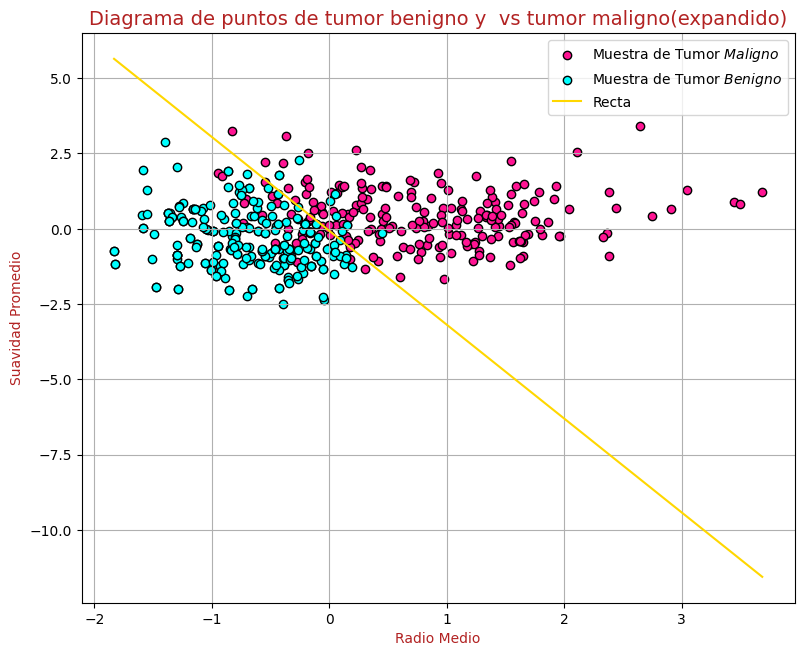

In [ ]:
plt.figure(figsize=(9.2, 7.4))
plt.scatter(Y[df["pronostic"] == 1][:, 0], Y[df["pronostic"] == 1][:, 1],
            color="deeppink", label="Muestra de Tumor $Maligno$", edgecolors="black")
plt.scatter(Y[df["pronostic"] == 0][:, 0], Y[df["pronostic"] == 0][:, 1],
            color="cyan",  label="Muestra de Tumor $Benigno$", edgecolors="black")

#Linea de separación
x_val = np.linspace(Y[:, 0].min(), Y[:, 0].max(), 100)
y_val = -(coeficiente_W[0] * x_val + Intercepto_b) / coeficiente_W[1]


plt.plot(x_val, y_val, color="gold", label="Recta")
#plot del mismo tamaño que los anteriores scatters

plt.title("Diagrama de puntos de tumor benigno y  vs tumor maligno", color ="firebrick", size =14)
plt.xlabel("Radio Medio", color ="firebrick", size =10)
plt.ylabel("Suavidad Promedio", color ="firebrick", size =10)
plt.ylim(-2.7,3.7)
plt.legend()
plt.grid(True)
plt.show()

#plot completo del scatter, en el que se observa el valor minimo y maximo de la linea de separación

plt.figure(figsize=(9.2, 7.4))
plt.scatter(Y[df["pronostic"] == 1][:, 0], Y[df["pronostic"] == 1][:, 1],
            color="deeppink", label="Muestra de Tumor $Maligno$", edgecolors="black")
plt.scatter(Y[df["pronostic"] == 0][:, 0], Y[df["pronostic"] == 0][:, 1],
            color="cyan",  label="Muestra de Tumor $Benigno$", edgecolors="black")

x_val = np.linspace(Y[:, 0].min(), Y[:, 0].max(), 100)
y_val = -(coeficiente_W[0] * x_val + Intercepto_b) / coeficiente_W[1]


plt.plot(x_val, y_val, color="gold", label="Recta")

plt.title("Diagrama de puntos de tumor benigno y  vs tumor maligno(expandido)", color ="firebrick", size =14)
plt.xlabel("Radio Medio", color ="firebrick", size =10)
plt.ylabel("Suavidad Promedio", color ="firebrick", size =10)
plt.legend()
plt.grid(True)
plt.show()


5. Una manera de verificar el funcionamiento del modelo es a través de alguna métrica (score). Una de ellas podría ser calculando el porcentaje de datos correctmente clasificados con respecto al total de datos. Note que, para una observación $x^{(j)}$, evaluada en la función de la recta de separación $w^Tx^{(j)}+b$, su valor resultante sería positivo o negativo si se encuentra de un lado de la frontera o del otro, dependiento del punto de vista del gráfico. En este sentido, escriba una función que reciba los coeficientes $w$, el intercepto $b$, el arreglo de observaciones $X$ y el vector de etiquetas $y$ y retorne el porcentaje de datos bien clasificados con respecto al total de datos.

In [ ]:
def score(coef_w,intercept_b,X,y):
    valores = X @ coef_w + intercept_b
    prediccion =(valores >= 0).astype(int)
    accuracy = np.mean(prediccion == y) * 100

    return accuracy

puntaje = score(coeficiente_W,Intercepto_b,Y,pronostic)
print("porcentaje de datos bien categorizado:", {puntaje},"%")

#Esto nos indica si los datos pudieron ser clasificados.

porcentaje de datos bien categorizado: {92.53731343283582} %


6. Hay que notar que, en este caso, la frontera entre los datos tenía un comportamiento aproximadamente lineal. Sin embargo, este no es siempre el caso. Para analizar esto, se utilizarán otros datos con un comportamiento diferente. Importe los datos *datos.txt* donde las dos primeras columnas corresponden a las observaciones y la tercera a las etiquetas. Luego, realice el mismo **scater plot** con estos nuevos datos.

        Radio  Suavidad  pronostico
0    0.550649  0.337354        -1.0
1    0.120590  0.840109        -1.0
2   -0.004209  0.009832        -1.0
3    0.250346  0.489550        -1.0
4   -0.299583 -0.238759        -1.0
..        ...       ...         ...
995 -1.490366  0.510181         1.0
996  0.793387  1.806181         1.0
997  0.813330 -1.507753         1.0
998  1.536577  0.303115         1.0
999  1.865983 -0.648994         1.0

[1000 rows x 3 columns]


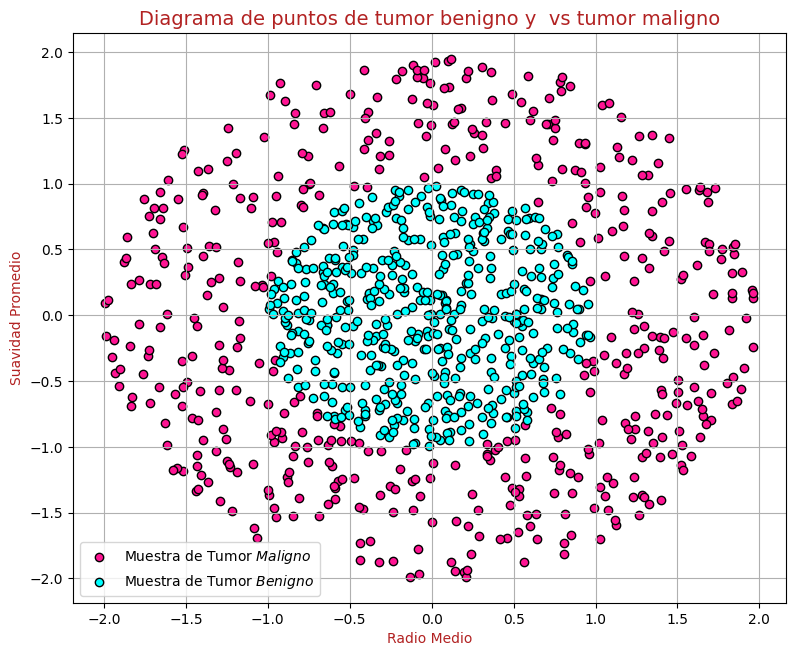

In [ ]:
texto = pd.read_csv("data.txt", delim_whitespace=True, header=None)

texto.columns = ["Radio", "Suavidad", 'pronostico']

print(texto)
#Se observa que en este caso, se tomara -1.0 como pronostico negativo, es decir sera benigno, en contraste, se tomara 1.0 como un caso positivo o maligno


# Scatter plot de datos.txt

plt.figure(figsize=(9.2, 7.4))
plt.scatter(texto[texto["pronostico"] == 1]["Radio"], texto[texto["pronostico"] == 1]["Suavidad"],
            color="deeppink", label="Muestra de Tumor $Maligno$", edgecolors="black")
plt.scatter(texto[texto["pronostico"] == -1]["Radio"], texto[texto["pronostico"] == -1]["Suavidad"],
            color="cyan", label="Muestra de Tumor $Benigno$", edgecolors="black")
plt.title("Diagrama de puntos de tumor benigno y  vs tumor maligno", color ="firebrick", size =14)
plt.xlabel("Radio Medio", color ="firebrick", size =10)
plt.ylabel("Suavidad Promedio", color ="firebrick", size =10)
plt.legend()
plt.grid(True)
plt.show()


7. Use sus funciones anteriores para estandarizar y obtener los coeficientes $w$ y el inctercepto $b$ con estos nuevos datos. Luego, realice el mismo **scatter plot** pero ahora incluyendo la recta de separación resultante.

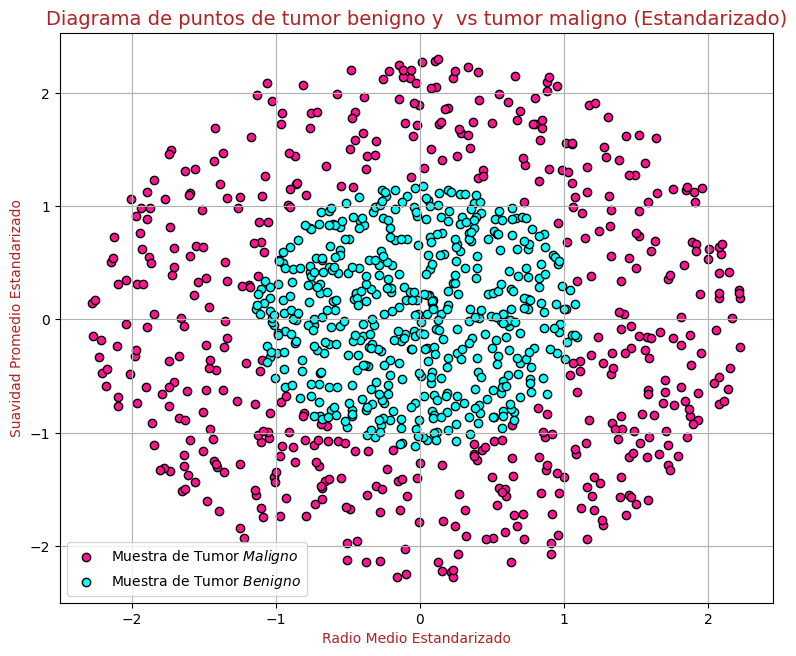

[ 0.10734536 -0.10364229]
[2.67160502e-05]


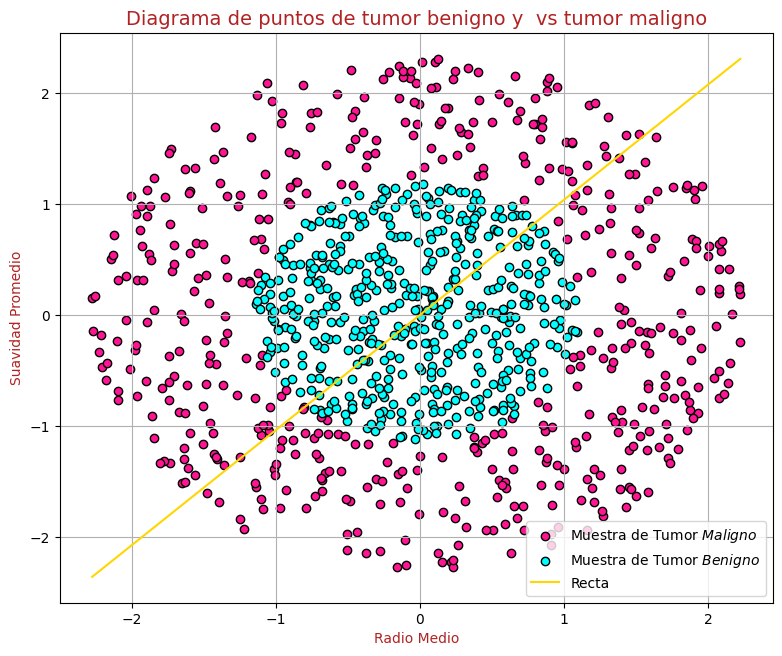

In [ ]:
from sklearn.svm import SVC

def estandarizacion(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

X2 = texto[["Radio", "Suavidad"]]
Y2 = estandarizacion(X2)

#Scatter plot estandar

plt.figure(figsize=(9.2, 7.4))
plt.scatter(Y2[texto["pronostico"] == 1][:, 0], Y2[texto["pronostico"] == 1][:, 1],
            color="deeppink", label="Muestra de Tumor $Maligno$", edgecolors="black")
plt.scatter(Y2[texto["pronostico"] == -1][:, 0], Y2[texto["pronostico"] == -1][:, 1],
            color="cyan", label="Muestra de Tumor $Benigno$", edgecolors="black")
plt.title("Diagrama de puntos de tumor benigno y  vs tumor maligno (Estandarizado)", color="firebrick", size=14)
plt.xlabel("Radio Medio Estandarizado", color="firebrick", size=10)
plt.ylabel("Suavidad Promedio Estandarizado", color="firebrick", size=10)
plt.legend()
plt.grid(True)
plt.show()


pronostico = texto['pronostico']
coeficientes, intercepto = coe_intercepto(Y2, pronostico)

print(coeficientes)
print(intercepto)

#Scatter plot con linea de sepearación

plt.figure(figsize=(9.2, 7.4))
plt.scatter(Y2[texto["pronostico"] == 1][:, 0], Y2[texto["pronostico"] == 1][:, 1],
            color="deeppink", label="Muestra de Tumor $Maligno$", edgecolors="black")
plt.scatter(Y2[texto["pronostico"] == -1][:, 0], Y2[texto["pronostico"] == -1][:, 1],
            color="cyan", label="Muestra de Tumor $Benigno$", edgecolors="black")

#Linea de separación
x_val2 = np.linspace(Y2[:, 0].min(), Y2[:, 0].max(), 100)
y_val2 = -(coeficientes[0] * x_val2 + intercepto) / coeficientes[1]


plt.plot(x_val2, y_val2, color="gold", label="Recta")
#plot del texto.txt con linea de separación

plt.title("Diagrama de puntos de tumor benigno y  vs tumor maligno", color ="firebrick", size =14)
plt.xlabel("Radio Medio", color ="firebrick", size =10)
plt.ylabel("Suavidad Promedio", color ="firebrick", size =10)
plt.legend()
plt.grid(True)
plt.show()




8. Use su función de score anterior para calcular el porcentaje de datos bien clasificados con respecto al total de datos.

In [ ]:
def porcentajes_txt(w, b, X, y):
    decision_values = np.dot(X, w) + b
    y_pred = np.where(decision_values >= 0, 1, -1)
    exactitud = np.mean(y_pred == y) * 100
    return exactitud

exactitud2 = porcentajes_txt(coeficientes, intercepto, Y2, pronostico)

print("Porcentaje",exactitud2,"%")

Porcentaje 53.5 %


9. Para realizar un análisis apropiado, responda las siguientes preguntas:

- Analice el gráfico de observaciones después de haber estandarizado los datos. También, revise la documentación de la función utilizada para estandarizar. ¿Cómo se estandarizan los datos?

Al explorar la documentación oficial, encontré que la función $StandardScaler$, al igual que como su nombre indica, estandariza en 0 las variables al almacenar la media y desviacion estandar de los datos[1]. Posteriormente se usa la función $fit_transform$ que muta los datos al restar la media de la variable y dividiendo por la desviación estándar. De esta manera los datos quedan en 0, y como se menciono en la guía esta es para evitar que las variables presenten errores, al tener variables que se prioricen ante otras[2].

[1]“sklearn.preprocessing.StandardScaler”. scikit-learn. Accedido el 17 de mayo de 2024. [En línea]. Disponible: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[2]“Difference Between fit(), transform(), and fit_transform() Methods in Scikit-Learn”. Analytics Vidhya. Accedido el 17 de mayo de 2024. [En línea]. Disponible: https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/


- Teniendo el cuenta el gráfico donde se incluye la recta de separación para los datos de cancer, ¿por dónde se trazó la recta de separación?

En los graficos del 4 punto, se puede observar que los datos de Radio y suavidad fueron trzados por una linea diagonal que separo completamente los 2 grupos, siendo capaz de identificar correctamente los datos con una confianza del 92.537%. Asimismo, se puede concluir que los datos siguen una distribución en la que mayor sea el radio medio y mayor la suavidad media/promedio, se encontrara cada vez con mas probabilidades de tener celuas cancerigenas o en proceso de mutación carcinogénica. Finalmente, la recta al ser una ecuación de decisión matematica, como se vio en clase, se puede clasificar hacia un tipo de diagnostico dependiendo del radio y la suavidad media, por ejemplo, datos con radio y suavidad altos se inclinaran a un diagnostico de celulas cancerigenas. En contraste, valores mas bajos se predispondran a celulas benignas.

- Teniendo en cuenta el gráfico donde se incluye la recta de separación para los datos nuevos, ¿considera que el modelo de recta funciona para estos datos?, ¿qué modelo matemático podría funcionar para este caso?

No, el modelo de recta no funciona para estos datos, como se puede observar en los graficos del punto 7, la recta tiene una confianza del 53.5 % para predecir que datos son de celulas cancerigenas o benignas. Es decir, la recta sigue una distribución que es medida al azar o tiene una efectividad aleatoria(≈50%) de acertar que dato pertenece a un grupo, por lo que al usar este modelo se tiene una probabilidad incierta e inexacta de acertar que dato puede pertenecer a un grupo o a otro. Ahora bien, como se observo en la clase un modelo podria ser el algoritmo de K-means que se basa en la distancia o cluster que se formen de la clasificación, se utiliza para la agrupación y usa los modulos de python de from sklearn.cluster import KMeans. De igual modo, se puede observar que las distribuciones de los dos grupos siguen un comportamiento eliptico o ciruclar, por lo que se podria diseñar una función que a traves de unos datos seleccionados, genere una funcion circular. Sin embargo, realmente no pude encontrar información sobre funciones de decision circulares.

- Recuerde la forma en el que usted logró identificar si un dato fue bien o mal clasificado. Teniendo en cuenta el modelo matemático propuesto en la pregunta anterior, ¿cómo podría saber si un dato fue bien o mal clasficiado?

Para el caso del algoritmo de K-means, inicialmente, se asignaria cada punto a un grupo, luego, se mapea los clusters a clases con etiquetas reales y se compara, de este manera al formarse los clusters, diseñado por las distancias entre los datos, se podria conocer que dato pertenece con la distancia entre dato 𝑥𝑖 y cluster k, se genera los centroides y se formaria los cluster, que en este serian 2. Por otro lado, para la elpise se podria implementar una region de acpetación, si esta dentro de la elipse, y una region de rechazo si esta afuera de la elipse, se generaria niveles o sub-grupos para determinar si el punto pertenece o no a esa etiqueta. La precisión se calcula comparando estas clasificaciones con las etiquetas o grupos reales de las celulas benignas y cancerigenas.

